In [2]:
import numpy as np
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# read all datasets
data_file = "Transfomed indices.xlsx"

temporal_data = pd.read_excel(data_file ,sheet_name= 'Barisal', parse_dates =[['Year', 'Month']], index_col = 'Year_Month')
temporal_data

,CDD,CWD,PRCPTOT,R10mm,R20mm,R30mm,Rx1day,Rx3day,Rx5day,DRT,...,TR,TN10p,Tx10p,Tx90p,tmge5,tmge10,Tn90p,Txge30,Txge35,Txgt50p
Year_Month,,,,,,,,,,,,,,,,,,,,,
1980-01-01,47,0,0,0,0,0,0,0,0,13.75,...,0,12.90,9.52,12.74,30,30,12.26,0,0,49.52
1980-02-01,35,3,55,3,0,0,18,28,40,13.89,...,2,20.69,17.07,0.00,29,29,13.79,9,0,45.86
1980-03-01,18,2,47,2,1,0,25,40,40,12.32,...,10,12.58,11.94,0.00,30,30,3.23,24,0,32.90
1980-04-01,12,1,13,0,0,0,7,9,9,9.44,...,29,3.33,0.00,12.50,28,28,32.00,28,11,88.00
1980-05-01,8,7,235,9,4,2,45,70,88,9.03,...,29,12.90,11.29,2.90,30,30,8.39,28,5,46.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,3,10,342,10,7,3,53,86,126,6.02,...,31,0.00,0.00,25.81,31,31,35.48,31,0,83.87
2017-09-01,4,11,228,7,4,2,52,101,106,6.65,...,30,3.33,0.00,26.67,30,30,6.67,30,2,63.33
2017-10-01,8,6,387,6,6,3,186,247,255,7.19,...,30,3.23,12.90,25.81,31,31,25.81,25,1,45.16


In [3]:
temporal_data['Tnx']

Year_Month
1980-01-01    16.0
1980-02-01    21.5
1980-03-01    24.5
1980-04-01    27.5
1980-05-01    28.0
              ... 
2017-08-01    28.0
2017-09-01    27.5
2017-10-01    27.0
2017-11-01    23.0
2017-12-01    22.0
Name: Tnx, Length: 456, dtype: float64

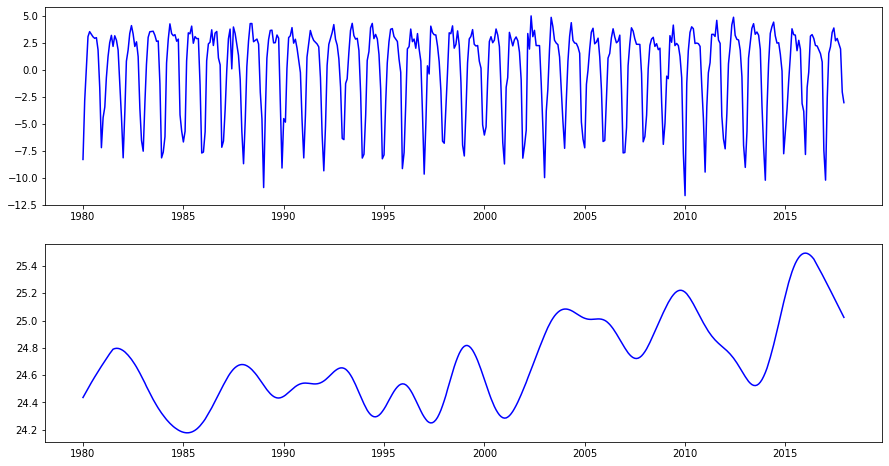

In [4]:
components = seasonal_decompose(temporal_data['Tnx'], model='additive')
Dhaka_trend =components.trend
# components.seasonal.plot() 

#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html#statsmodels.tsa.seasonal.STL
#https://www.statsmodels.org/stable/api.html
#https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html
from statsmodels.tsa.seasonal import STL

stl = STL(temporal_data['Tnx'], seasonal=3)
res = stl.fit()
Dhaka_trend_stl = res.trend



fig, ax = plt.subplots(2,1,figsize=(15, 8))
ax[0].plot(res.seasonal, color='blue')
ax[1].plot(Dhaka_trend_stl, color='blue')
plt.show()



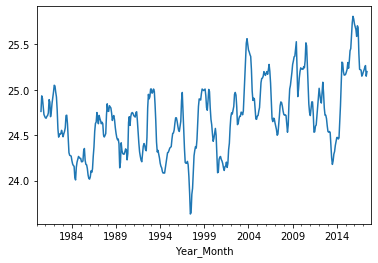

In [41]:
components.trend.plot()

In [5]:
temporal_data.columns

Index(['CDD', 'CWD', 'PRCPTOT', 'R10mm', 'R20mm', 'R30mm', 'Rx1day', 'Rx3day',
       'Rx5day', 'DRT', 'SU', 'Tnm', 'Tmm', 'Txm', 'Txn', 'Txx', 'Tnn', 'Tnx',
       'TR', 'TN10p', 'Tx10p', 'Tx90p', 'tmge5', 'tmge10', 'Tn90p', 'Txge30',
       'Txge35', 'Txgt50p'],
      dtype='object')

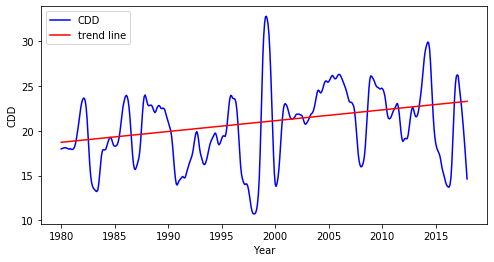

CDD 0.0060175609216726045
CDD 0.010046531616538013


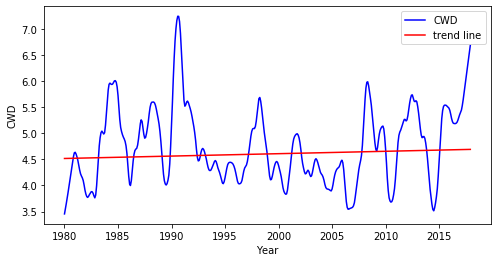

CWD 0.6660355531501914
CWD 0.00038263490669542433


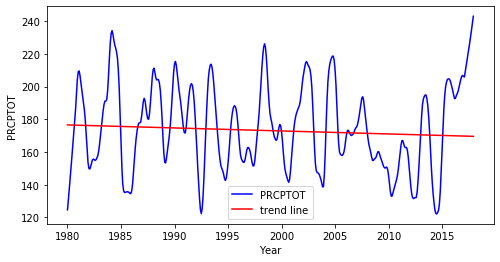

PRCPTOT 0.42298865134744723
PRCPTOT -0.015297019415674563


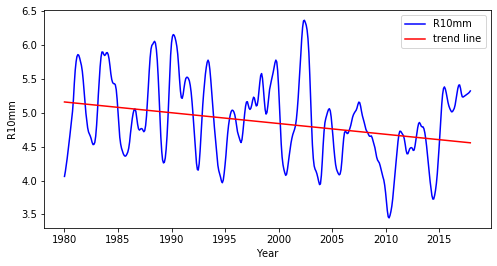

R10mm 0.007299968693898595
R10mm -0.0013243482033371248


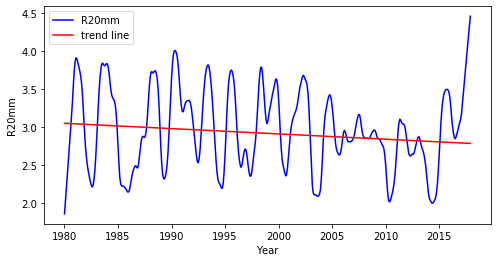

R20mm 0.1433590230255275
R20mm -0.0005814079612732705


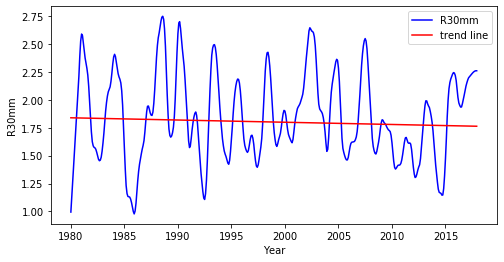

R30mm 0.5030269917743491
R30mm -0.00016621271527349993


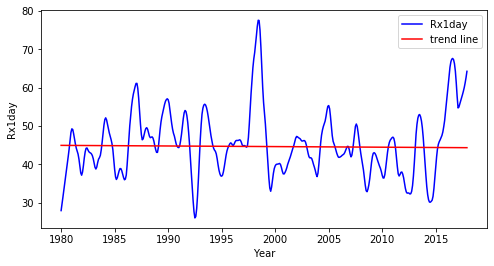

Rx1day 0.8616444118343276
Rx1day -0.0013249024595092054


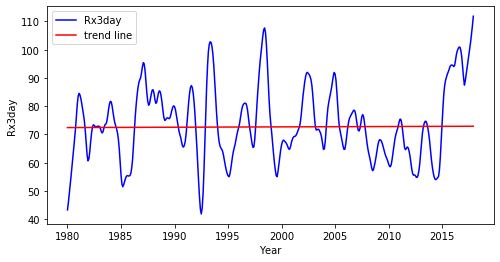

Rx3day 0.9264100628821119
Rx3day 0.0010320008321658726


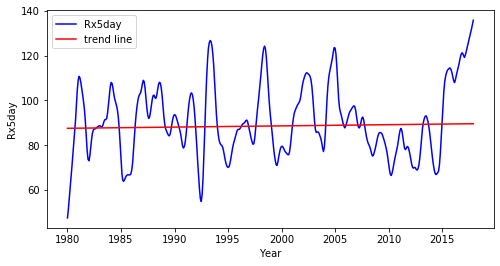

Rx5day 0.7334706255136627
Rx5day 0.004489626611628203


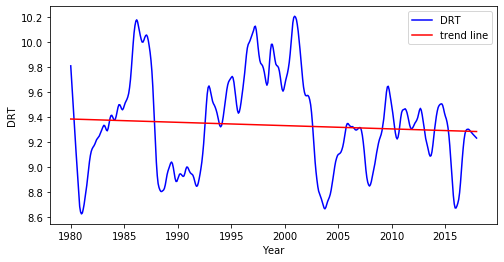

DRT 0.6531800373251304
DRT -0.00022014672793883438


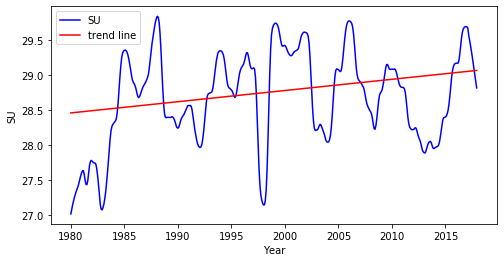

SU 0.14283701394700654
SU 0.0013348130311251606


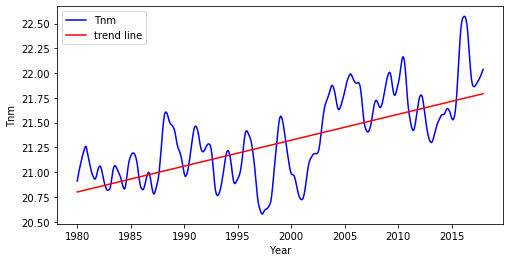

Tnm 7.232193182993285e-06
Tnm 0.0021799028983099785


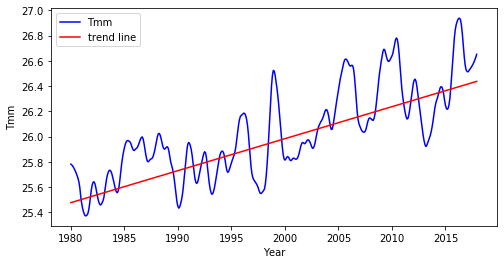

Tmm 1.6229928512245806e-10
Tmm 0.0021112440647777057


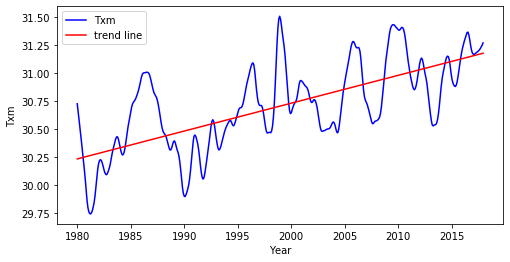

Txm 0.0
Txm 0.0020722060524114385


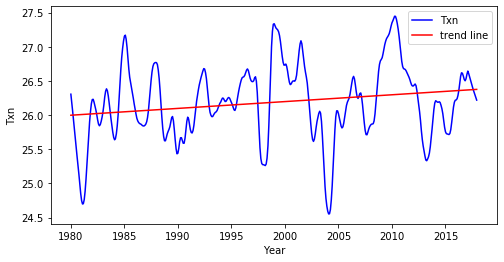

Txn 0.036588046991395506
Txn 0.0008305122028900889


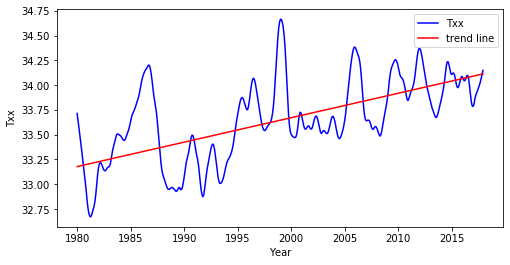

Txx 2.5750503951371684e-09
Txx 0.002054257556648979


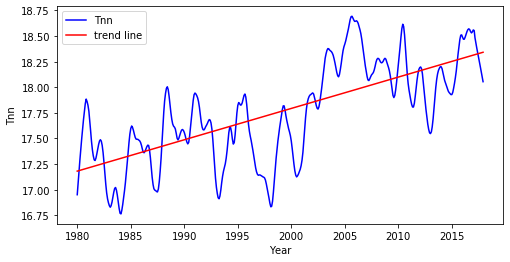

Tnn 5.557645454956628e-10
Tnn 0.002546157998381271


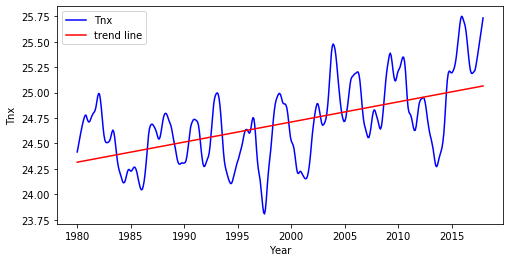

Tnx 1.6225094136235185e-05
Tnx 0.0016470381703632688


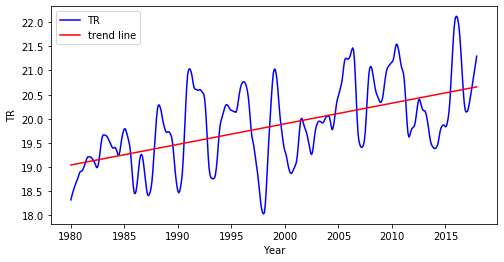

TR 7.793765632868599e-14
TR 0.0035533777706774315


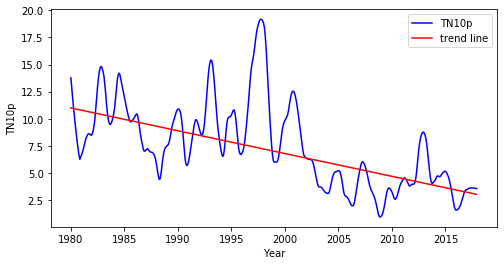

TN10p 9.323310477427071e-06
TN10p -0.017528933228458773


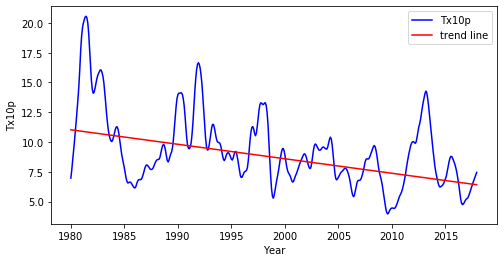

Tx10p 1.2935146065373715e-08
Tx10p -0.010143383635894301


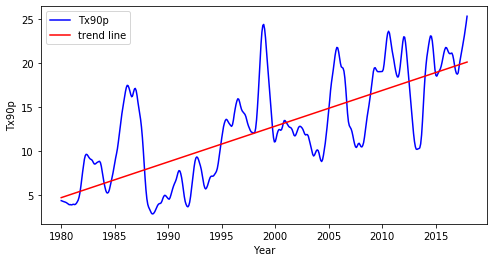

Tx90p 9.43689570931383e-14
Tx90p 0.03374427818241082


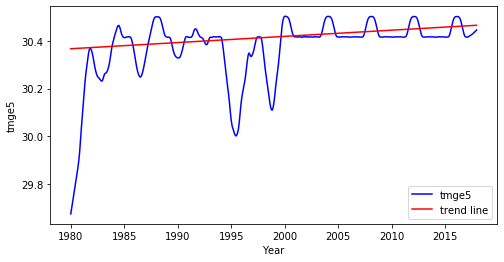

tmge5 5.18411463534818e-06
tmge5 0.00021621983076748868


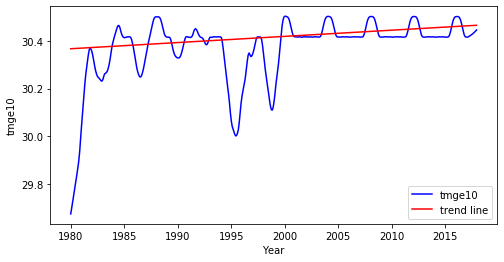

tmge10 5.18411463534818e-06
tmge10 0.00021621983076748868


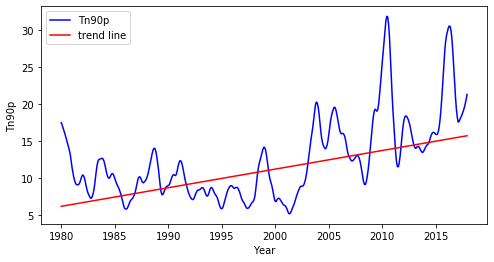

Tn90p 0.010615144481527672
Tn90p 0.020973390370167017


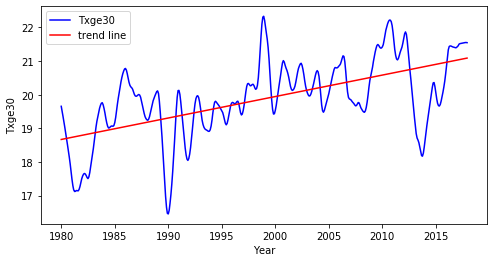

Txge30 1.5760566185463176e-09
Txge30 0.005321350115618566


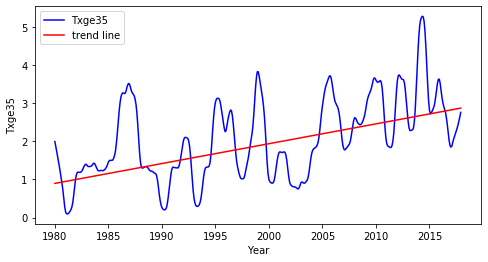

Txge35 1.1872352210673398e-05
Txge35 0.004351241144803822


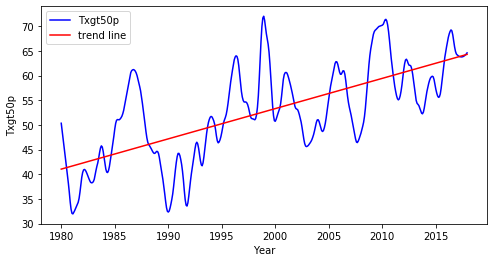

Txgt50p 2.4802382370125997e-13
Txgt50p 0.05111192587878666


In [45]:
indics = ['CDD', 'CWD', 'PRCPTOT', 'R10mm', 'R20mm', 'R30mm', 'Rx1day', 'Rx3day',
       'Rx5day', 'DRT', 'SU', 'Tnm', 'Tmm', 'Txm', 'Txn', 'Txx', 'Tnn', 'Tnx',
       'TR', 'TN10p', 'Tx10p', 'Tx90p', 'tmge5', 'tmge10', 'Tn90p', 'Txge30',
       'Txge35', 'Txgt50p']



for ind in indics:
#     components = seasonal_decompose(temporal_data[ind], model='additive')
    stl = STL(temporal_data[ind], seasonal=19)
    res = stl.fit()
    Dhaka_trend_stl = res.trend
    
#     Dhaka_trend =components.trend
    result = mk.hamed_rao_modification_test(Dhaka_trend_stl)
    trend_line = np.arange(len(Dhaka_trend)) * result.slope + result.intercept
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(Dhaka_trend_stl, color='blue')
    ax.plot(Dhaka_trend_stl.index, trend_line, color='red')
    ax.legend([ind, 'trend line'])
    
    plt.xlabel('Year')
    plt.ylabel(ind)
    plt.show()
    print(ind, result.p)
    print(ind, result.slope)


In [15]:
print(res.p)

0.004489887929268743


In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
res = mk.hamed_rao_modification_test(DTR)
trend_line = np.arange(len(DTR)) * res.slope + res.intercept

trend_line